In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append("../")
sys.path.append("../py")
import folderparser as fp
import folderscraper as fs
import interfacemetrics as intm
from interfacePlots import *
from config import cfg
import logging

In [3]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [4]:
SERVERFOLDER = os.path.join(cfg.path.server, r'conicalNozzle')
EXPORTFOLDER = os.path.join(cfg.path.fig, 'conicalNozzle', 'plots')
TOPFOLDERS = [os.path.join(SERVERFOLDER, s) for s in ['orig', 'speed_sweep', 'diameter', 'k', 'newtonian', 'newt_diameter']]

# Generating Files

#### generate table of metadata for all folders

In [70]:
import pandas as pd
o = []
for topfolder in TOPFOLDERS:
    for f in fp.caseFolders(topfolder):
        fs.populate(f)
        l = fp.legendUnique(f)
        if len(l)>0:
            o.append(l)
p = pd.DataFrame(o)
fn = os.path.join(cfg.path.fig, 'conicalNozzle', 'legend_general.csv')
p.to_csv(fn)
logging.info(f'Exported {fn}')

INFO:root:Exported file //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\orig\cn0\legend.csv
INFO:root:Exported file //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\orig\cn10\legend.csv
INFO:root:Exported file //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\orig\cn137\legend.csv
INFO:root:Exported file //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\orig\cn138\legend.csv
INFO:root:Exported file //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\orig\cn139\legend.csv
INFO:root:Exported file //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\orig\cn140\legend.csv
INFO:root:Exported file //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheol

In [42]:
import pandas as pd
o = []
for topfolder in [os.path.join(SERVERFOLDER, 'newt_diameter')]:
    for f in fp.caseFolders(topfolder):
        fs.populate(f)
        l = fp.legendUnique(f)
        if len(l)>0:
            o.append(l)
p = pd.DataFrame(o)
fn = os.path.join(SERVERFOLDER, 'newt_diameter', 'newt_diameter_legend.csv')
p.to_csv(fn)
logging.info(f'Exported {fn}')

INFO:root:path //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\newt_diameter\cn200\0\U does not exist
INFO:root:Exported file //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\newt_diameter\cn200\legend.csv
INFO:root:Exported file //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\newt_diameter\cn234\legend.csv
INFO:root:Exported file //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\newt_diameter\cn235\legend.csv
INFO:root:Exported file //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\newt_diameter\cn236\legend.csv
INFO:root:Exported file //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\newt_diameter\cn239\legend.csv
INFO:root:Exported file //cfs2e.nis

#### analyze slices and export files

In [ ]:
for topfolder in TOPFOLDERS:
    for folder in fp.caseFolders(topfolder):
        df, u = intm.importSS(folder)
        if len(df)>0:
            dftimes = df.time.unique()
            files = os.listdir(os.path.join(folder, 'interfacePoints'))
            if len(dftimes)<len(files):
                intm.sumAndSteady(folder, True)

# Plots

### nozzle angle, bath size

In [298]:
time = 2.5
x = 5
labels = ['arean', 'vertdispn', 'aspectratio', 'speeddecay']
xvar = 'nozzle_angle'
yvar = 'bath_depth'
imsize=1
kwargs = {'overwrite':True, 'xvar':xvar, 'yvar':yvar}

# export plots
exportMeta = False
exportMetrics = False
exportXS = False
exportPics = True
exportSteady = False
exportStress = False
piclist = ['y_viscy', 'x_viscx', 'y_umag', 'y_shearStressy']

for TOPFOLDER in [TOPFOLDERS[0]]:
    if exportMeta:
        # metadata
        txtPlots0(TOPFOLDER, EXPORTFOLDER, **kwargs)
        timePlots(TOPFOLDER, EXPORTFOLDER, **kwargs)
        runtimePlots0(TOPFOLDER, EXPORTFOLDER, **kwargs)

    if exportMetrics:
        # metrics: aspect ratio, speed, area
        qualityPlots0(TOPFOLDER, EXPORTFOLDER, time, x, labels=labels, cvar=yvar, **kwargs)

    if exportXS:
        # cross-sections
        XSPlots0(TOPFOLDER, EXPORTFOLDER, time, x, **kwargs)

    if exportPics:
        # images
        for ta in piclist:
            picPlots0(TOPFOLDER, EXPORTFOLDER, time, 0, tag=ta, **kwargs)

    if exportSteady:
        # stability
        steadyPlots(TOPFOLDER, imsize, EXPORTFOLDER, [0], **kwargs)

    if exportStress:
        # shear stress vs. position
        shearStressPlots0(TOPFOLDER, EXPORTFOLDER, time, cvar=xvar, bath_depth_list=[6.05], **kwargs)
        shearStressPlots0(TOPFOLDER, EXPORTFOLDER, time, cvar=xvar, bath_depth_list=[4.24, 4.35, 4.72, 5.12], **kwargs)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_y_viscy_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_x_viscx_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_y_umag_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_y_shearStressy_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth


In [338]:
kwargs = {'overwrite':True, 'xvar':xvar, 'yvar':yvar}
qualityPlots0(TOPFOLDERS[0], EXPORTFOLDER, time, x, labels=['aspectratio', 'speeddecay'], cvar='', bath_depth_list=[6.05], **kwargs)
[picPlots0(TOPFOLDERS[0], EXPORTFOLDER, time, 0, tag=ta, bath_depth_list=[6.05], adjustBounds=False, **kwargs) for ta in ['y_shearStressy', 'y_viscy']]

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\trace_across_orig_bath_depth_list_[6.05]_volume_False_xvar_rbar


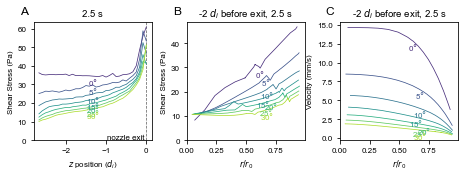

In [377]:
withinNozzle0(TOPFOLDERS[0], EXPORTFOLDER, 2.5, -2
              , zunits='nozzle_inner_width'
              , bath_depth_list=[6.05], overwrite=True
              , volume=False, xvar='rbar')

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\xs_8nozzle_inner_width_t_2.5_orig_bath_depth_list_[6.05]_cvar_nozzle_angle_xvar_nozzle_angle_yvar_bath_depth


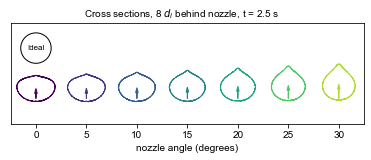

In [351]:
XSPlots0(TOPFOLDERS[0], EXPORTFOLDER, 2.5, 8, xunits='nozzle_inner_width', 
         bath_depth_list=[6.05], cvar='nozzle_angle', 
         xvar='nozzle_angle', yvar='bath_depth', overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\survivalMulti_orig_cvar_nozzle_angle_bath_depth_list_[6.05]_volume_False


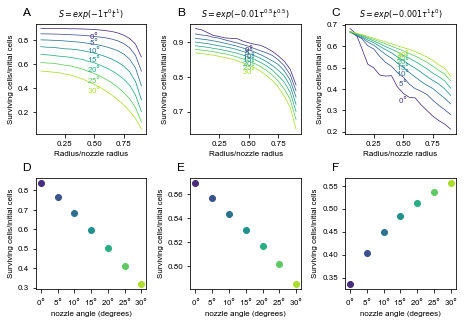

In [390]:
survivalRMultiRow(TOPFOLDERS[0], EXPORTFOLDER, 
                  cvar='nozzle_angle', bath_depth_list=[6.05]
                  , overwrite=True, volume=False)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\survival_z_cn137_0.01_0.5_0.5_nozzle_inner_width_orig_
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\survival_z_cn140_0.01_0.5_0.5_nozzle_inner_width_orig_


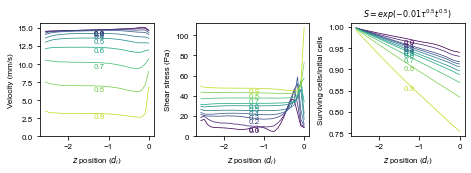

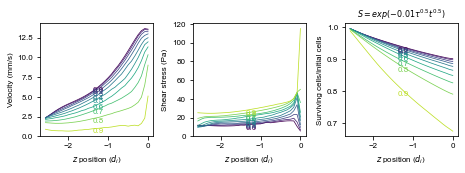

In [72]:
for s in [137, 140]:
    folder = os.path.join(SERVERFOLDER, 'orig', f'cn{s}')
    for d in [{'a':10**-2, 'b':0.5, 'c':0.5}]:
        survivalPlot(folder, EXPORTFOLDER, 'z',  a=d['a'], b=d['b'], c=d['c']
                     , dr=0.1, export=True, overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\line_2.5_['vz', 'vx', 'nu']_nozzle_angle_orig_x_1.4_bath_depth_list_[6.05]_nozzle_angle_list_[0, 10, 20, 30]


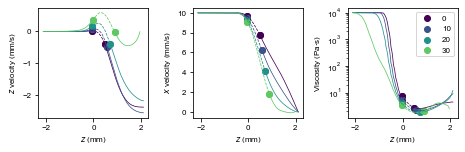

In [268]:
topfolder = os.path.join(SERVERFOLDER, 'orig')
linePlots0(topfolder, EXPORTFOLDER, 'nozzle_angle', 2.5, imsize=6.5, yvar=['vz', 'vx', 'nu'], 
           x=1.4, bath_depth_list=[6.05], nozzle_angle_list=[0,10,20,30], export=True, overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_a_stre_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth_bath_depth_list_[6.05]_nozzle_angle_list_[0, 10, 20, 30]


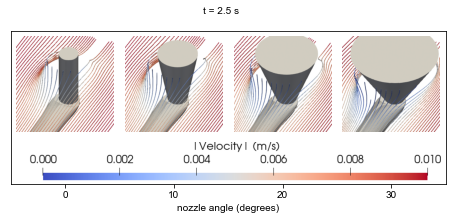

In [251]:
topfolder = os.path.join(SERVERFOLDER, 'orig')
for s in ['a_stre', 'x_viscx', 'y_viscy', 'y_umag']:
    picPlots0(topfolder, EXPORTFOLDER, 2.5, 0, tag=s
              , overwrite=True, xvar='nozzle_angle', yvar='bath_depth'
          , bath_depth_list=[6.05], nozzle_angle_list=[0,10,20,30], imsize=8)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\viscRatio_d.pdf


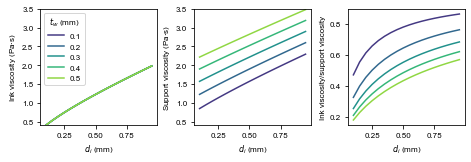

In [152]:
fig,axs = plt.subplots(1,3, figsize=(6.5, 3.25))
f = os.path.join(SERVERFOLDER, 'orig', 'cn137')
twlist = [0.1, 0.2, 0.3, 0.4, 0.5]
cm = sns.color_palette('viridis', n_colors=len(twlist))
for i,tw in enumerate(twlist):
    dlist = []
    for di in np.arange(0.1, 1, 0.05):
        do = di+2*tw
        d = intm.viscRatio(f, di=di, do=do)   # get the viscosity ratio
        d['di'] = di  # get the color
        d['do'] = do
        dlist.append(d)   # save these values to list
    df = pd.DataFrame(dlist)
    axs[0].plot(df['di'], df['ink_visc'], label=tw, color=cm[i])
    axs[1].plot(df['di'], df['sup_visc'], label=tw, color=cm[i])
    axs[2].plot(df['di'], df['viscRatio'], label=tw, color=cm[i])

    
axs[0].legend(title='$t_w$ (mm)')
axs[0].set_ylabel('Ink viscosity (Pa$\cdot$s)')
axs[1].set_ylabel('Support viscosity (Pa$\cdot$s)')
for ax in [axs[0], axs[1]]:
    ax.set_ylim([0.4, 3.5])
axs[2].set_ylabel('Ink viscosity/support viscosity')
for ax in axs:
    ax.set_xlabel('$d_i$ (mm)')
    setSquare(ax)
fig.tight_layout()
intm.exportIm(os.path.join(EXPORTFOLDER, 'viscRatio_d.pdf'), fig)

### speed

In [278]:
time = 2.5
x = 2
xvar = 'vsup'
yvar = 'nozzle_angle'
labels = ['arean', 'vertdispn', 'aspectratio', 'speeddecay']
kwargs = {'overwrite':True, 'xvar':xvar, 'yvar':yvar}

# export plots
exportMeta = False
exportMetrics = False
exportXS = False
exportPics = True
exportSteady = False
exportStress = False

for TOPFOLDER in [TOPFOLDERS[2]]:
    if exportMeta:
        # metadata
        txtPlots0(TOPFOLDER, EXPORTFOLDER, **kwargs)
        timePlots(TOPFOLDER, EXPORTFOLDER, **kwargs)
        runtimePlots0(TOPFOLDER, EXPORTFOLDER, **kwargs)

    if exportMetrics:
        # metrics: aspect ratio, speed, area
        qualityPlots0(TOPFOLDER, EXPORTFOLDER, time, x, labels=labels, cvar=yvar, **kwargs)

    if exportXS:
        # cross-sections
        XSPlots0(TOPFOLDER, EXPORTFOLDER, time, x,  **kwargs)

    if exportPics:
        # images
        for ta in ['y_viscy', 'x_viscx', 'y_umag']:
            picPlots0(TOPFOLDER, EXPORTFOLDER, t, 0, tag=ta, adjustBounds=False, **kwargs)

    if exportSteady:
        # stability
        steadyPlots(TOPFOLDER, imsize, EXPORTFOLDER, [0], **kwargs)

    if exportStress:
        # shear stress vs. position
        shearStressPlots0(TOPFOLDER, EXPORTFOLDER, time, cvar=xvar, **kwargs)


INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\pics_y_viscy_t2.5_sigma_0_speed_sweep_xvar_vsup_yvar_nozzle_angle
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\pics_x_viscx_t2.5_sigma_0_speed_sweep_xvar_vsup_yvar_nozzle_angle
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\pics_y_umag_t2.5_sigma_0_speed_sweep_xvar_vsup_yvar_nozzle_angle


INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\trace_across_speed_sweep_xvar_rbar_volume_False_vsup_list_5-7.5-10-12.5-15_nozzle_angle_list_0
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\trace_across_speed_sweep_xvar_rbar_volume_False_vsup_list_5-7.5-10-12.5-15_nozzle_angle_list_15


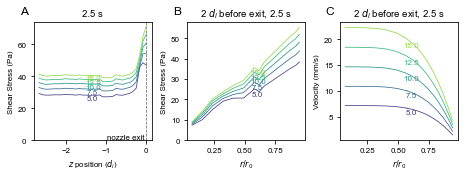

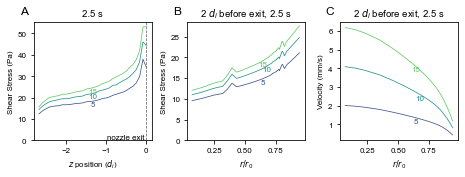

In [202]:
for na in [0, 15]:
    withinNozzle0(os.path.join(SERVERFOLDER, 'speed_sweep'), EXPORTFOLDER, 2.5, 2
              , zunits='nozzle_inner_width', 
              cvar='vsup', overwrite=True 
              , xvar='rbar', volume=False
              , vsup_list=[5, 7.5, 10, 12.5, 15]
             , nozzle_angle_list=[na])

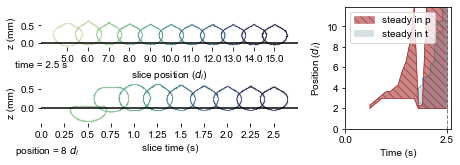

In [23]:
stabilityPlot(os.path.join(SERVERFOLDER, 'speed_sweep', 'cn15'), EXPORTFOLDER, 2.5, 8, xunits='nozzle_inner_width', export=False)

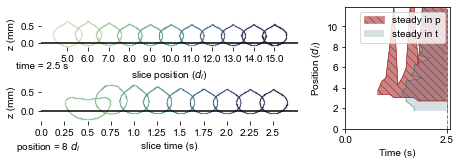

In [22]:
stabilityPlot(os.path.join(SERVERFOLDER, 'speed_sweep', 'cn233'), EXPORTFOLDER, 2.5, 8, xunits='nozzle_inner_width', export=False)

No handles with labels found to put in legend.


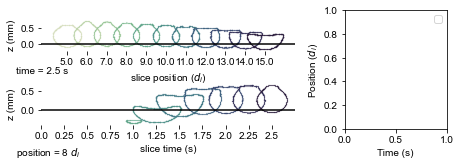

In [24]:
stabilityPlot(os.path.join(SERVERFOLDER, 'speed_sweep', 'cn232'), EXPORTFOLDER, 2.5, 8, xunits='nozzle_inner_width', export=False)

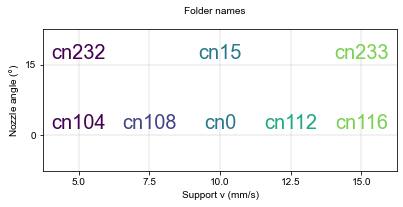

In [206]:
txtPlots0(os.path.join(SERVERFOLDER, 'speed_sweep'), EXPORTFOLDER
         , xunits='nozzle_inner_width', 
         cvar='vsup', xvar='vsup', yvar='nozzle_angle',
         vsup_list=[5, 7.5, 10, 12.5, 15], overwrite=True, fontsize=20)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\xs_8nozzle_inner_width_t_2.5_speed_sweep_cvar_vsup_xvar_vsup_yvar_nozzle_angle_vsup_list_5-7.5-10-12.5-15


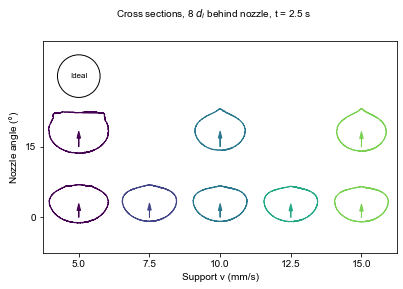

In [197]:
XSPlots0(os.path.join(SERVERFOLDER, 'speed_sweep'), EXPORTFOLDER, 2.5, 8
         , xunits='nozzle_inner_width', 
         cvar='vsup', xvar='vsup', yvar='nozzle_angle',
         vsup_list=[5, 7.5, 10, 12.5, 15], overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\survivalMulti_speed_sweep_cvar_vsup_volume_False_vsup_list_5-7.5-10-12.5-15_nozzle_angle_list_0
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\survivalMulti_speed_sweep_cvar_vsup_volume_False_vsup_list_5-7.5-10-12.5-15_nozzle_angle_list_15


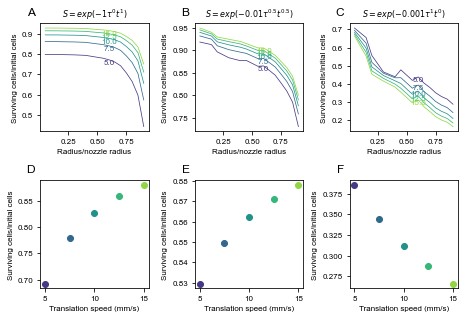

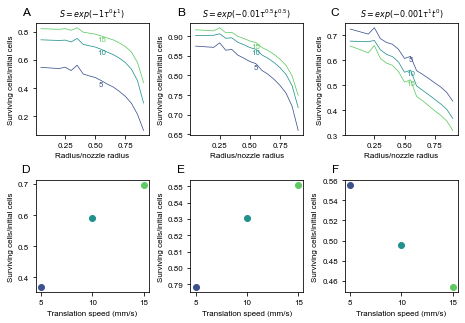

In [203]:
for na in [0,15]:
    survivalRMultiRow(os.path.join(SERVERFOLDER, 'speed_sweep'), EXPORTFOLDER, cvar='vsup'
                  , volume=False
                  , vsup_list=[5, 7.5, 10, 12.5, 15]
                  , nozzle_angle_list=[na], overwrite=True)

INFO:root:2.5 not in [5.0, 7.5, 10.0, 12.5, 15.0]
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\pics_y_umag_t1_sigma_0_speed_sweep_xvar_vsup_yvar_nozzle_angle_vsup_list_5-7.5-10-12.5-15


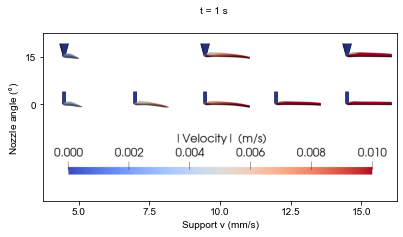

In [196]:
picPlots0(os.path.join(SERVERFOLDER, 'speed_sweep'), EXPORTFOLDER, 1, 0
          , tag='y_umag', overwrite=True, xvar='vsup', yvar='nozzle_angle', vsup_list=[5, 7.5, 10, 12.5, 15])

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\aspectratio_viscRatio_speed_sweep_mvar_nozzle_angle_vsup_list_5-7.5-10-12.5-15


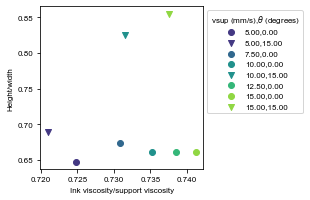

In [201]:
viscRatioPlot0(os.path.join(SERVERFOLDER, 'speed_sweep'), EXPORTFOLDER
               , 2.5, 8, xunits='nozzle_inner_width', yvar='aspectratio', cvar='vsup', mvar='nozzle_angle'
              , overwrite=True, export=True, vsup_list=[5, 7.5, 10, 12.5, 15])

### diameter

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\trace_across_diameter_xvar_rbar_volume_False_nozzle_angle_list_[0]
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\trace_across_diameter_xvar_rbar_volume_False_nozzle_angle_list_[15]


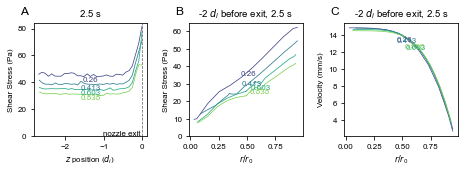

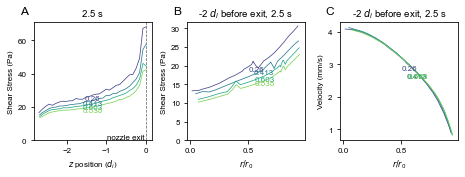

In [454]:
topfolder = os.path.join(SERVERFOLDER, 'diameter')
for na in [0, 15]:
    withinNozzle0(topfolder, EXPORTFOLDER, 2.5, -2
                  , zunits='nozzle_inner_width', cvar='nozzle_inner_width'
                  , xvar='rbar', volume=False
                  , nozzle_angle_list=[na], overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\xs_6nozzle_inner_width_t_2.5_diameter_cvar_nozzle_inner_width_xvar_nozzle_inner_width_yvar_vink_nozzle_angle_list_[0]


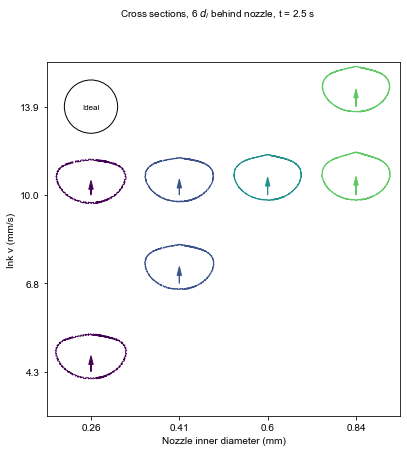

In [105]:
topfolder = os.path.join(SERVERFOLDER, 'diameter')
XSPlots0(topfolder, EXPORTFOLDER, 2.5, 6, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='nozzle_inner_width'
         , yvar='vink', nozzle_angle_list=[0],  overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\xs_6nozzle_inner_width_t_2.5_diameter_cvar_nozzle_inner_width_xvar_vink_bn_list_['cn209', 'cn208', 'cn137', 'cn226']_yvar_vink_nozzle_angle_list_[0]


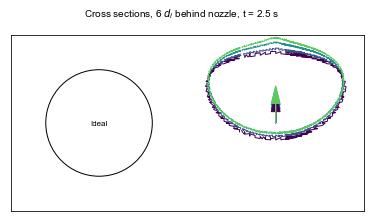

In [154]:
topfolder = os.path.join(SERVERFOLDER, 'diameter')
XSPlots0(topfolder, EXPORTFOLDER, 2.5, 6, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='vink', bn_list=['cn209', 'cn208', 'cn137', 'cn226']
         , yvar='vink', nozzle_angle_list=[0],  overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\xs_6nozzle_inner_width_t_2.5_diameter_cvar_nozzle_inner_width_xvar_ink_k_bn_list_['cn254', 'cn253', 'cn137', 'cn252']_yvar_ink_k_nozzle_angle_list_[0]


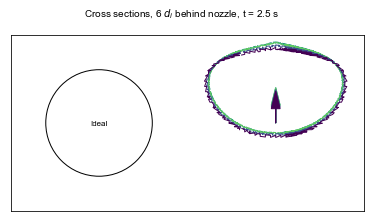

In [153]:
topfolder = os.path.join(SERVERFOLDER, 'diameter')
XSPlots0(topfolder, EXPORTFOLDER, 2.5, 6, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='ink_k', bn_list=['cn254', 'cn253', 'cn137', 'cn252']
         , yvar='ink_k', nozzle_angle_list=[0],  overwrite=True)

1.6519999999999997


INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\stability_cn208_t_2.5_x_8_diameter_


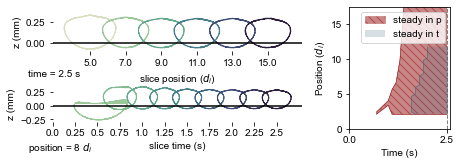

In [40]:
stabilityPlot(os.path.join(SERVERFOLDER, 'diameter', 'cn208'), EXPORTFOLDER, 2.5, 8, xunits='nozzle_inner_width', export=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\stability_cn209_t_2.5_x_8_diameter_
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\stability_cn208_t_2.5_x_8_diameter_
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\stability_cn137_t_2.5_x_8_diameter_
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\stability_cn226_t_2.5_x_8_diameter_


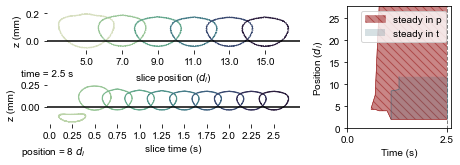

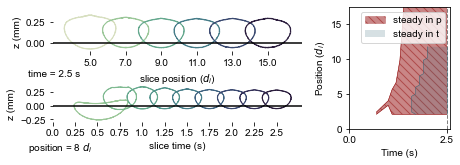

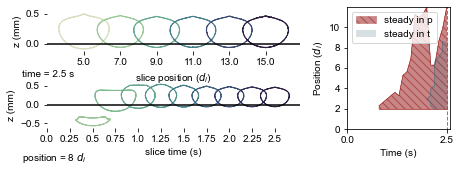

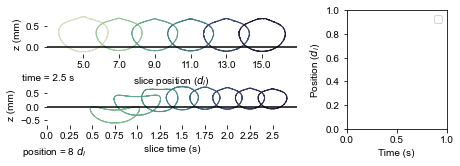

In [71]:
for f in ['cn209', 'cn208', 'cn137', 'cn226']:
    stabilityPlot(os.path.join(SERVERFOLDER, 'diameter', f), EXPORTFOLDER, 2.5, 8, xunits='nozzle_inner_width', export=True)

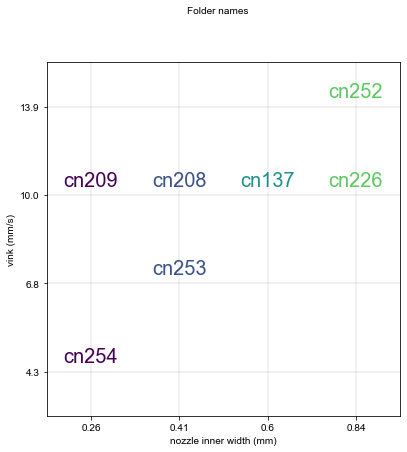

In [91]:
topfolder = os.path.join(SERVERFOLDER, 'diameter')
txtPlots0(topfolder, EXPORTFOLDER, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='nozzle_inner_width'
         , yvar='vink', nozzle_angle_list=[0], overwrite=True, fontsize=20)

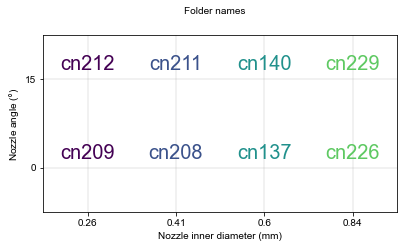

In [189]:
topfolder = os.path.join(SERVERFOLDER, 'diameter')
txtPlots0(topfolder, EXPORTFOLDER, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='nozzle_inner_width'
         , yvar='nozzle_angle', vsup_list=[10], overwrite=True, fontsize=20)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\xs_6nozzle_inner_width_t_2.5_diameter_cvar_nozzle_inner_width_xvar_nozzle_inner_width_yvar_vink_nozzle_angle_list_[0]


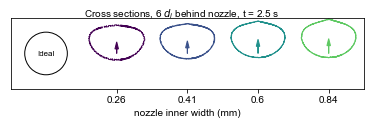

In [83]:
topfolder = os.path.join(SERVERFOLDER, 'diameter')
XSPlots0(topfolder, EXPORTFOLDER, 2.5, 6, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='nozzle_inner_width'
         , yvar='vink', nozzle_angle_list=[0], overwrite=True)

In [186]:
topfolder = os.path.join(SERVERFOLDER, 'diameter')
for s in ['y_umag', 'y_viscy', 'a_stre', 'y_py', 'x_viscx']:
    picPlots0(topfolder, EXPORTFOLDER, 2.5, 0, tag=s, overwrite=True, supv_list=[10]
          , xvar='nozzle_inner_width', yvar='nozzle_angle')

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\pics_y_umag_t2.5_sigma_0_diameter_supv_list_10_xvar_nozzle_inner_width_yvar_nozzle_angle
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\pics_y_viscy_t2.5_sigma_0_diameter_supv_list_10_xvar_nozzle_inner_width_yvar_nozzle_angle
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\pics_a_stre_t2.5_sigma_0_diameter_supv_list_10_xvar_nozzle_inner_width_yvar_nozzle_angle
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\pics_y_py_t2.5_sigma_0_diameter_supv_list_10_xvar_nozzle_inner_width_yvar_nozzle_angle
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\pics_x_viscx_t2.5_sigma_0_diameter_supv_list_10_xvar_nozzle_inner_width_yvar_nozzle_angle


INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\survivalMulti_diameter_cvar_nozzle_inner_width_nozzle_angle_list_[0]_volume_False


ZeroDivisionError: division by zero

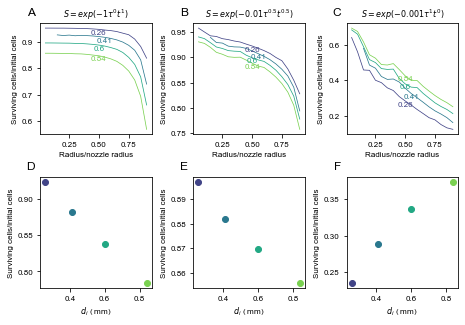

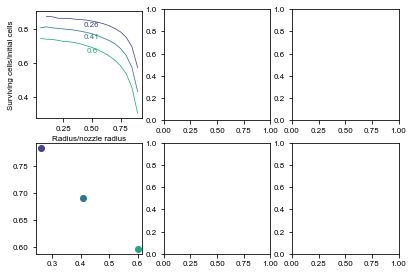

In [476]:
topfolder = os.path.join(SERVERFOLDER, 'diameter')
for na in [0,15]:
    survivalRMultiRow(topfolder, EXPORTFOLDER, cvar='nozzle_inner_width'
                  , nozzle_angle_list=[na], volume=False, overwrite=True, export=True)

In [211]:
[metricVals(os.path.join(SERVERFOLDER, 'diameter', s), 2.5, 8
           , ['aspectratio'], xunits='nozzle_inner_width') for s in ['cn208', 'cn209', 'cn226', 'cn137']]

[{'aspectratio': 0.645959225165189},
 {'aspectratio': 0.6310286283004508},
 {'aspectratio': 0.7072309199460268},
 {'aspectratio': 0.6818662271234776}]

In [213]:
0.7072309/0.6310286

1.1207588689324064

In [192]:
l1 = [metricVals(os.path.join(SERVERFOLDER, 'diameter', s), 2.5, 8
           , ['aspectratio'], xunits='nozzle_inner_width') for s in ['cn212', 'cn229']]
print(l1)
l1[1]['aspectratio']/l1[0]['aspectratio']

[{'aspectratio': 0.8089213533212389}, {'aspectratio': 0.8746613375344013}]


1.0812686968186087

In [220]:
for s in ['cn209', 'cn226']:
    xlist, ylist = shearStressCalcSlice(os.path.join(SERVERFOLDER, 'diameter', s), 2.5, 'nozzle_inner_width')
    print(s, np.mean(ylist[0:20]))
(45.585-31.377)/45.585

cn209 45.58568459270254
cn226 31.377347614471567


0.3116814741691346

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\aspectratio_viscRatio_diameter_mvar_vsup_nozzle_angle_list_[0]


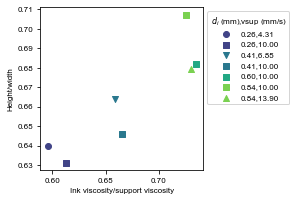

In [173]:
viscRatioPlot0(os.path.join(SERVERFOLDER, 'diameter'), EXPORTFOLDER
               , 2.5, 8, xunits='nozzle_inner_width'
               , yvar='aspectratio', cvar='nozzle_inner_width'
               , xvar='viscRatio', mvar='vsup', nozzle_angle_list=[0]
              , overwrite=True, export=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\line_2.5_['vz', 'vx', 'nu']_nozzle_inner_width_diameter_x_2_xunits_nozzle_inner_width_bn_list_cn209-cn208-cn137-cn226_zunits_nozzle_inner_width_nozzle_angle_list_0


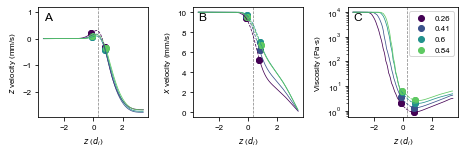

In [183]:
topfolder = os.path.join(SERVERFOLDER, 'diameter')
linePlots0(topfolder, EXPORTFOLDER, 'nozzle_inner_width', 2.5
           , imsize=6.5, yvar=['vz', 'vx', 'nu'], 
           x=2, xunits='nozzle_inner_width', bn_list=['cn209', 'cn208', 'cn137', 'cn226'],
           zunits='nozzle_inner_width', nozzle_angle_list=[0], export=True, overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\line_2.5_['vz', 'vx', 'nu']_nozzle_inner_width_diameter_x_2_xunits_nozzle_inner_width_bn_list_cn254-cn253-cn137-cn252_zunits_nozzle_inner_width_nozzle_angle_list_0


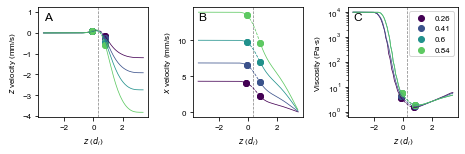

In [182]:
topfolder = os.path.join(SERVERFOLDER, 'diameter')
linePlots0(topfolder, EXPORTFOLDER, 'nozzle_inner_width', 2.5
           , imsize=6.5, yvar=['vz', 'vx', 'nu'], 
           x=2, xunits='nozzle_inner_width', bn_list=['cn254', 'cn253', 'cn137', 'cn252'],
           zunits='nozzle_inner_width', nozzle_angle_list=[0], export=True, overwrite=True)

### newtonian diameter

In [130]:
extractTP(os.path.join(SERVERFOLDER, 'newt_diameter', 'cn255'))

{'folder': '//cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\\conicalNozzle\\newt_diameter\\cn255',
 'openfoam_version': '',
 'compare_to': 'newt_diameter',
 'snappyHexMesh_time_s': '',
 'snappyHexMesh_time_min': '',
 'interFoam_time_s': '',
 'interFoam_time_hr': '',
 'simulation_time': 0.0,
 'simulation_rate': '',
 '': '',
 'mesh': '',
 'GEOMETRY': '',
 'nozzle_inner_width': 0.838,
 'nozzle_thickness': 0.216,
 'bath_width': 13.427999999999999,
 'bath_depth': 8.399999999999999,
 'nozzle_length': 2.5239999999999996,
 'bath_left_coord': -6.7139999999999995,
 'bath_right_coord': 6.7139999999999995,
 'bath_front_coord': 4.199999999999999,
 'bath_back_coord': -4.199999999999999,
 'bath_bottom_coord': -2.9429999999999996,
 'bath_top_coord': 2.9429999999999996,
 'nozzle_bottom_coord': 0.419,
 'nozzle_center_x_coord': -3.352,
 'nozzle_center_y_coord': 0.0,
 'nozzle_angle': 0.0,
 'horizontal': ' False',
 'bath_velocity': 0.013897180762852405,
 'ink_vel

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newt_diameter\trace_across_newt_diameter_xvar_rbar_volume_False_vink_list_[10]


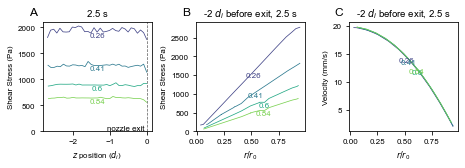

In [124]:
topfolder = os.path.join(SERVERFOLDER, 'newt_diameter')
withinNozzle0(topfolder, EXPORTFOLDER, 2.5, -2
                  , zunits='nozzle_inner_width', cvar='nozzle_inner_width'
                  , xvar='rbar', volume=False, vink_list=[10]
                  , overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newt_diameter\trace_across_newt_diameter_xvar_rbar_volume_False_vink_list_[10]


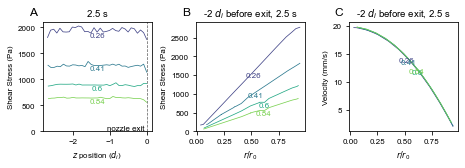

In [124]:
topfolder = os.path.join(SERVERFOLDER, 'newt_diameter')
withinNozzle0(topfolder, EXPORTFOLDER, 2.5, -2
                  , zunits='nozzle_inner_width', cvar='nozzle_inner_width'
                  , xvar='rbar', volume=False, vink_list=[10]
                  , overwrite=True)

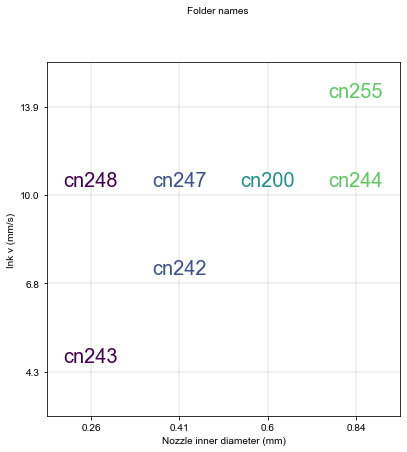

In [135]:
txtPlots0(os.path.join(SERVERFOLDER, 'newt_diameter'), EXPORTFOLDER, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='nozzle_inner_width'
         , yvar='vink', overwrite=True, fontsize=20)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newt_diameter\xs_6nozzle_inner_width_t_2.5_newt_diameter_cvar_nozzle_inner_width_xvar_nuink_bn_list_['cn243', 'cn242', 'cn200', 'cn255']_yvar_nuink


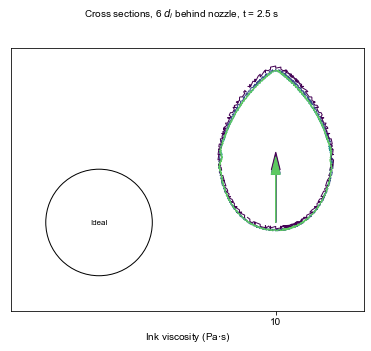

In [145]:
topfolder = os.path.join(SERVERFOLDER, 'newt_diameter')
XSPlots0(topfolder, EXPORTFOLDER, 2.5, 6, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='nuink', bn_list=['cn243', 'cn242', 'cn200', 'cn255']
         , yvar='nuink', overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newt_diameter\xs_6nozzle_inner_width_t_2.5_newt_diameter_cvar_nozzle_inner_width_xvar_nuink_bn_list_['cn248', 'cn247', 'cn200', 'cn244']_yvar_nuink


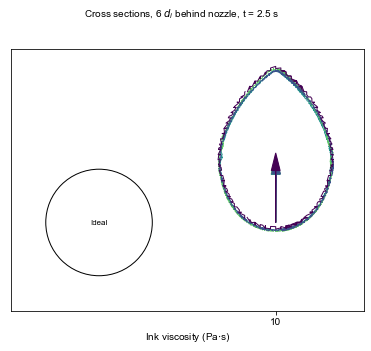

In [146]:
topfolder = os.path.join(SERVERFOLDER, 'newt_diameter')
XSPlots0(topfolder, EXPORTFOLDER, 2.5, 6, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='nuink', bn_list=['cn248', 'cn247', 'cn200', 'cn244']
         , yvar='nuink', overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newt_diameter\xs_6nozzle_inner_width_t_2.5_newt_diameter_cvar_nozzle_inner_width_xvar_nozzle_inner_width_vink_list_[10]_yvar_vink


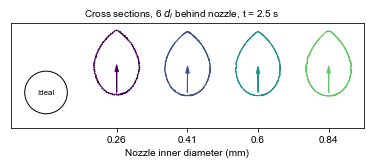

In [123]:
topfolder = os.path.join(SERVERFOLDER, 'newt_diameter')
XSPlots0(topfolder, EXPORTFOLDER, 2.5, 6, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='nozzle_inner_width', vink_list=[10]
         , yvar='vink', overwrite=True)

## newtonian

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newtonian\xs_8nozzle_inner_width_t_2.5_newtonian_cvar_nozzle_angle_xvar_nozzle_angle_yvar_nuink_dy_0.7


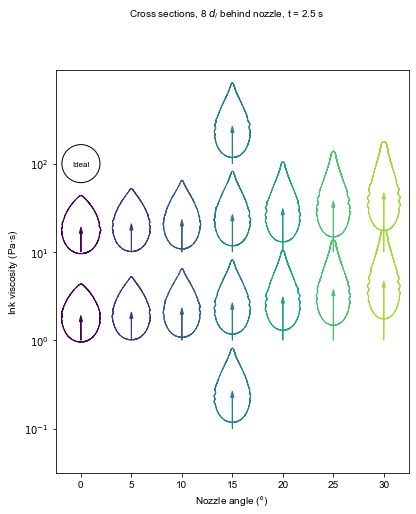

In [129]:
topfolder = os.path.join(SERVERFOLDER, 'newtonian')
XSPlots0(topfolder, EXPORTFOLDER, 2.5 , 8, xunits='nozzle_inner_width'
         , cvar='nozzle_angle', xvar='nozzle_angle', yvar='nuink', overwrite=True
        , dy=0.7, dx=0.4)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newtonian\trace_across_newtonian_xvar_rbar_volume_False_nuink_list_[1]
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newtonian\trace_across_newtonian_xvar_rbar_volume_False_nuink_list_[10]


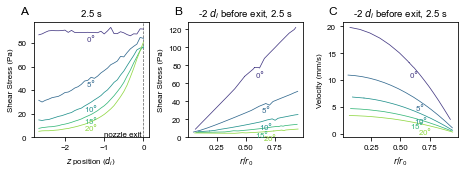

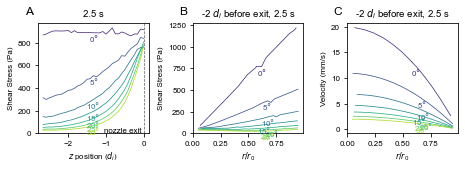

In [41]:
topfolder = os.path.join(SERVERFOLDER, 'newtonian')
for nuink in [1, 10]:
    withinNozzle0(topfolder, EXPORTFOLDER, 2.5, -2
                  , zunits='nozzle_inner_width', cvar='nozzle_angle'
                  , xvar='rbar', volume=False, export=True
                  , nuink_list=[nuink], overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newtonian\survivalMulti_newtonian_cvar_nozzle_angle_a3_0.0001_nuink_list_[1]_volume_False
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newtonian\survivalMulti_newtonian_cvar_nozzle_angle_a3_0.0001_nuink_list_[10]_volume_False


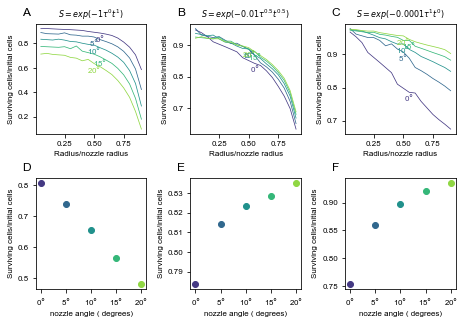

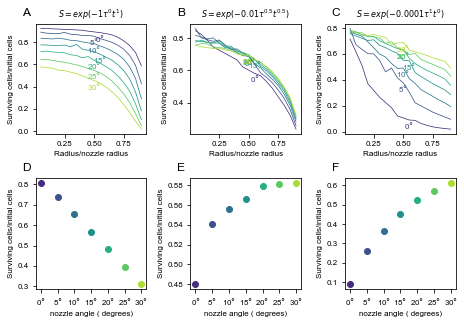

In [509]:
topfolder = os.path.join(SERVERFOLDER, 'newtonian')
for nuink in [1, 10]:
    survivalRMultiRow(topfolder, EXPORTFOLDER, cvar='nozzle_angle', a3=10**-4, fontsize=8
                  , nuink_list=[nuink], volume=False, overwrite=True, export=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newtonian\pics_a_stre_t2.5_sigma_0_newtonian_yvar_nuink_xvar_nozzle_angle_nuink_list_[10]_nozzle_angle_list_[0, 10, 20, 30]_export_True


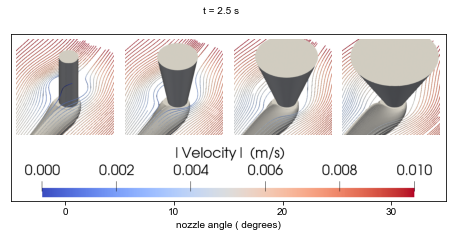

In [70]:
kwargs = {'xvar':'nozzle_angle', 'nuink_list':[10] , 'nozzle_angle_list':[0,10,20,30]
          , 'export':True, 'overwrite':True}
topfolder = os.path.join(SERVERFOLDER, 'newtonian')
picPlots0(topfolder, EXPORTFOLDER, 2.5, 0, tag='a_stre', imsize=8, yvar='nuink',
               **kwargs)

In [75]:
kwargs = {'xvar':'nozzle_angle'
          , 'nozzle_angle_list':[0,10,20,30], 'export':True, 'overwrite':True}

for s in ['newtonian', 'orig']:
    topfolder = os.path.join(SERVERFOLDER, s)
    if s=='newtonian':
        kwargs['nuink_list']=[10]
    else:
        kwargs.pop('nuink_list')
        kwargs['bath_depth_list'] = [6.05]
    linePlots0(topfolder, EXPORTFOLDER, 'nozzle_angle', 2.5, imsize=6.5
           , yvar=['vz', 'vx', 'nu'], x=1.4, **kwargs)
    picPlots0(topfolder, EXPORTFOLDER, 2.5, 0, tag='a_stre', imsize=8, yvar='ink_rho',
               **kwargs)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newtonian\line_2.5_['vz', 'vx', 'nu']_nozzle_angle_newtonian_x_1.4_xvar_nozzle_angle_nozzle_angle_list_[0, 10, 20, 30]_nuink_list_[10]
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newtonian\pics_a_stre_t2.5_sigma_0_newtonian_yvar_ink_rho_xvar_nozzle_angle_nozzle_angle_list_[0, 10, 20, 30]_export_True_nuink_list_[10]
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\line_2.5_['vz', 'vx', 'nu']_nozzle_angle_orig_x_1.4_xvar_nozzle_angle_nozzle_angle_list_[0, 10, 20, 30]_bath_depth_list_[6.05]
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_a_stre_t2.5_sigma_0_orig_yvar_ink_rho_xvar_nozzle_angle_nozzle_angle_list_[0, 10, 20, 30]_export_True_bath_depth_list_[6.05]


INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newtonian\aspectratio_viscRatio_newtonian_


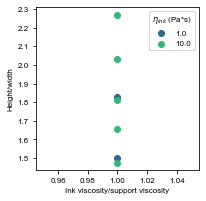

In [174]:
viscRatioPlot0(os.path.join(SERVERFOLDER, 'newtonian'), EXPORTFOLDER
               , 2.5, 8, xunits='nozzle_inner_width'
               , yvar='aspectratio', cvar='nuink'
              , overwrite=True, export=True)

## viscosity (k)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\k\xs_8nozzle_inner_width_t_2.5_k_xvar_kink_cvar_kink_yvar_nozzle_angle_export_True


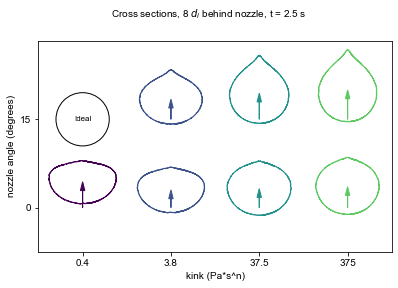

In [524]:
topfolder = os.path.join(SERVERFOLDER, 'k')
kwargs = {'xunits':'nozzle_inner_width', 'xvar':'kink', 
          'cvar':'kink', 'yvar':'nozzle_angle',
         'overwrite':True, 'export':True}

XSPlots0(topfolder, EXPORTFOLDER, 2.5 , 8, dx=0.5, **kwargs)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\k\pics_y_shearStressy_t2.5_sigma_0_k_xunits_nozzle_inner_width_xvar_kink_cvar_kink_yvar_nozzle_angle_export_True


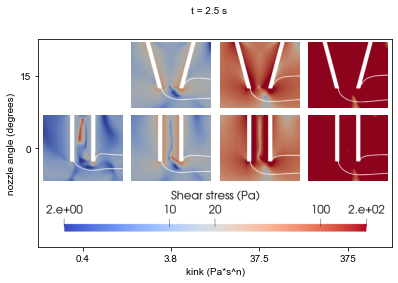

In [63]:
topfolder = os.path.join(SERVERFOLDER, 'k')
kwargs = {'xunits':'nozzle_inner_width', 'xvar':'kink', 
          'cvar':'kink', 'yvar':'nozzle_angle',
         'overwrite':True, 'export':True}

picPlots0(topfolder, EXPORTFOLDER, 2.5,0, 'y_shearStressy'
          , crops={'cropxl':200/1200, 'cropxr':500/1200, 'cropyt':400/1216, 'cropyb':650/1216}
          , **kwargs)

In [78]:
topfolder = os.path.join(SERVERFOLDER, 'k')
kwargs = {'xunits':'nozzle_inner_width', 'xvar':'kink', 
          'cvar':'kink', 'yvar':'nozzle_angle',
         'overwrite':True, 'export':True}

# for s in ['a_stre', 'y_viscy', 'x_viscx', 'y_py']:
for s in ['y_py']:
    picPlots0(topfolder, EXPORTFOLDER, 2.5,0, s, imsize=8
          , **kwargs)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\k\pics_y_py_t2.5_sigma_0_k_xunits_nozzle_inner_width_xvar_kink_cvar_kink_yvar_nozzle_angle


INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\k\names_k_xunits_nozzle_inner_width_xvar_kink_cvar_kink_yvar_nozzle_angle_export_True


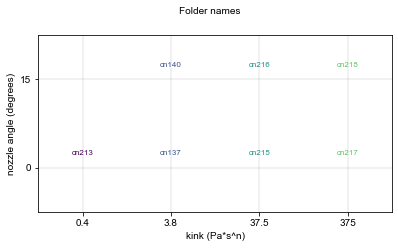

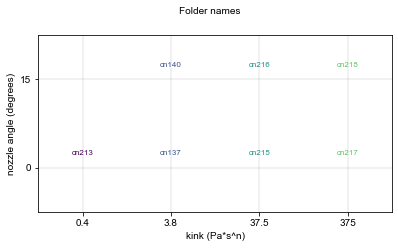

In [520]:
topfolder = os.path.join(SERVERFOLDER, 'k')
kwargs = {'xunits':'nozzle_inner_width', 'xvar':'kink', 
          'cvar':'kink', 'yvar':'nozzle_angle',
         'overwrite':True, 'export':True}

txtPlots0(topfolder, EXPORTFOLDER,  **kwargs)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\k\trace_across_k_nozzle_angle_list_[0]_xvar_rbar_volume_False_logy_True
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\k\trace_across_k_nozzle_angle_list_[15]_xvar_rbar_volume_False_logy_True


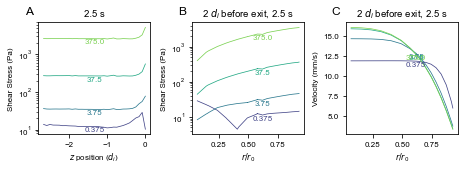

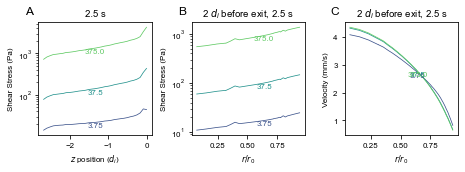

In [33]:
topfolder = os.path.join(SERVERFOLDER, 'k')
kwargs = {'zunits':'nozzle_inner_width', 'cvar':'kink', 'xvar':'rbar', 
         'overwrite':True, 'export':True, 'volume':False, 'logy':True}
for nozzle_angle in [0,15]:
    withinNozzle0(topfolder, EXPORTFOLDER, 2.5, 2, nozzle_angle_list=[nozzle_angle], **kwargs)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\k\survivalMulti_k_nozzle_angle_list_[0]_zunits_nozzle_inner_width_cvar_kink_volume_False_logx_True_a3_0.0001
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\k\survivalMulti_k_nozzle_angle_list_[15]_zunits_nozzle_inner_width_cvar_kink_volume_False_logx_True_a3_0.0001


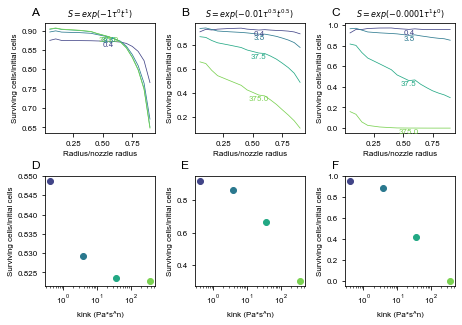

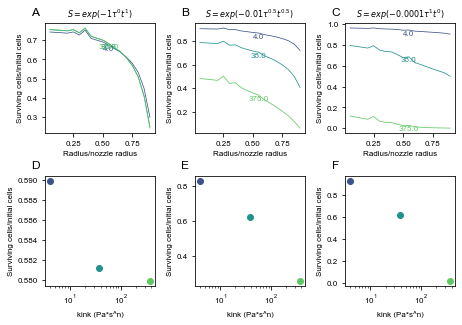

In [7]:
topfolder = os.path.join(SERVERFOLDER, 'k')
kwargs = {'zunits':'nozzle_inner_width', 'cvar':'kink',
         'overwrite':True, 'export':True, 'volume':False, 'logx':True, 'a3':10**-4}
for nozzle_angle in [0,15]:
    survivalRMultiRow(topfolder, EXPORTFOLDER, nozzle_angle_list=[nozzle_angle], **kwargs)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\k\aspectratio_viscRatio_k_


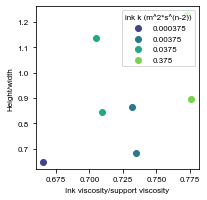

In [184]:
viscRatioPlot0(os.path.join(SERVERFOLDER, 'k'), EXPORTFOLDER
               , 2.5, 8, xunits='nozzle_inner_width'
               , yvar='aspectratio', cvar='ink_k'
              , overwrite=True, export=True)

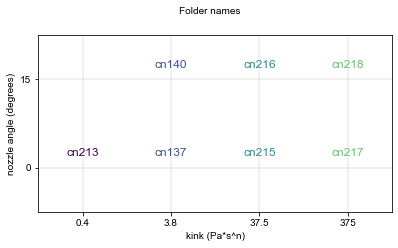

In [46]:
topfolder = os.path.join(SERVERFOLDER, 'k')
kwargs = {'xunits':'nozzle_inner_width', 'xvar':'kink', 
          'cvar':'kink', 'yvar':'nozzle_angle',
         'overwrite':True, 'export':False}

txtPlots0(topfolder, EXPORTFOLDER, fontsize=12, **kwargs)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\k\line_2.5_['vz', 'vx', 'nu']_kink_k_x_1.4_nozzle_angle_list_[0]


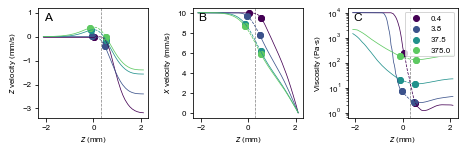

In [67]:
topfolder = os.path.join(SERVERFOLDER, 'k')
linePlots0(topfolder, EXPORTFOLDER, 'kink', 2.5, imsize=6.5
           , yvar=['vz', 'vx', 'nu'], 
           x=1.4, nozzle_angle_list=[0]
           , export=True, overwrite=True)

### Newtonian viscosity sweep

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newt_visc\xs_8nozzle_inner_width_t_2.5_newt_visc_xvar_nuink_cvar_nuink_yvar_nozzle_angle_imsize_8


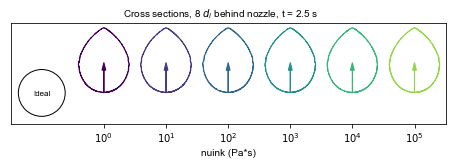

In [95]:
topfolder = os.path.join(SERVERFOLDER, 'newt_visc')
kwargs = {'xunits':'nozzle_inner_width', 'xvar':'nuink', 
          'cvar':'nuink', 'yvar':'nozzle_angle',
         'overwrite':True, 'export':True, 'imsize':8}

XSPlots0(topfolder, EXPORTFOLDER, 2.5, 8, dx=0.4,  **kwargs)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newt_visc\trace_across_newt_visc_xunits_nozzle_inner_width_xvar_rbar_logy_True_imsize_8_volume_False


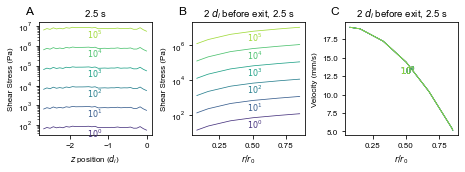

In [127]:
topfolder = os.path.join(SERVERFOLDER, 'newt_visc')
kwargs = {'xunits':'nozzle_inner_width', 'xvar':'rbar',
          'cvar':'nuink', 'logy':True, 'zunits':'nozzle_inner_width',
         'overwrite':True, 'export':True, 'imsize':8, 'volume':False}
withinNozzle0(topfolder, EXPORTFOLDER, 2.5, 2, **kwargs)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newt_visc\survivalMulti_newt_visc_xunits_nozzle_inner_width_xvar_nuink_zunits_nozzle_inner_width_cvar_nuink_yvar_nozzle_angle_volume_False_imsize_8_a3_1e-06_a2_0.0001_a1_1


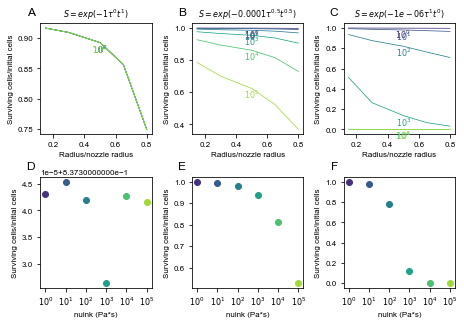

In [128]:
topfolder = os.path.join(SERVERFOLDER, 'newt_visc')
kwargs = {'xunits':'nozzle_inner_width', 'xvar':'nuink', 'zunits':'nozzle_inner_width',
          'cvar':'nuink', 'yvar':'nozzle_angle', 'volume':False, 
         'overwrite':True, 'export':True, 'imsize':8, 'a3':10**-6, 'a2':10**-4, 'a1':1}
survivalRMultiRow(topfolder, EXPORTFOLDER, **kwargs)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newt_visc\aspectratio_viscRatio_newt_visc_


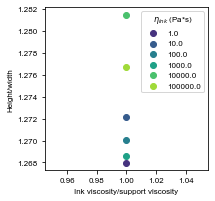

In [181]:
viscRatioPlot0(os.path.join(SERVERFOLDER, 'newt_visc'), EXPORTFOLDER
               , 2.5, 8, xunits='nozzle_inner_width'
               , yvar='aspectratio', cvar='nuink'
              , overwrite=True, export=True)